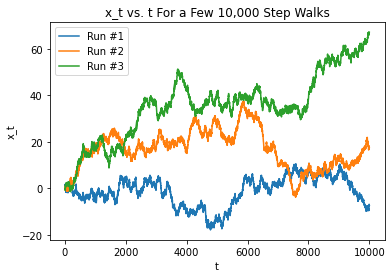

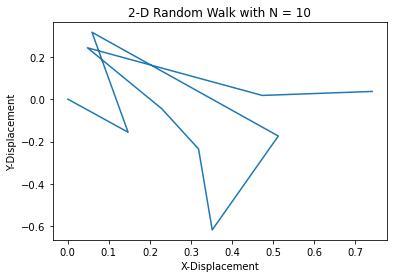

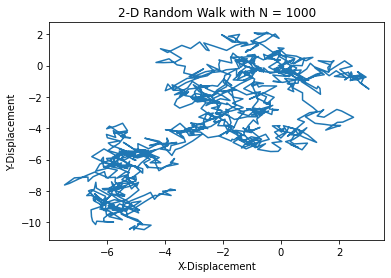

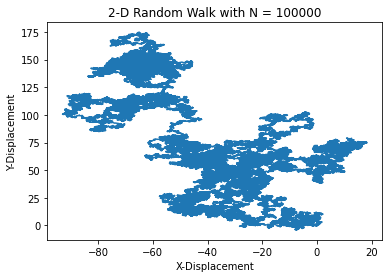

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random

#Part A
def CreateRandomWalk(N,d):
    step_array = np.zeros((N,d))
    s_n_t = np.zeros((N,d))
    net_array = np.zeros(d)
    
    def GenerateRand():
        val = random.uniform(-0.5,0.5)
        
        return val
    
    for dim in range (0,d):
        for element in range (0,N):
            step = GenerateRand()
            step_array[element,dim] = step
            net_array[dim] += step
            if (element < (N-1)):
                s_n_t[element+1,dim] = s_n_t[element,dim] + step
            
    
    return step_array, net_array, s_n_t

#Plot 3 x_t vs. t
N = 10000
d = 1
t = np.arange(N)

for i in range(0,3):
    s, n, x = CreateRandomWalk(N,d)
    plt.plot(t,x[:,0], label = "Run #%i" % (i+1))
    plt.title("x_t vs. t For a Few 10,000 Step Walks")
    plt.xlabel("t")
    plt.ylabel("x_t")
plt.legend()
plt.show()

#Now plot x vs. y for values of N
N = [10,1000,100000]
d = 2
for nn in N:   
    s, n, x = CreateRandomWalk(nn,d)
    plt.plot(x[:,0],x[:,1])
    plt.title("2-D Random Walk with N = %i" % nn)
    plt.xlabel("X-Displacement")
    plt.ylabel("Y-Displacement")
    plt.show()

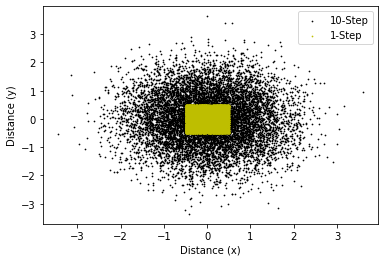

In [19]:
#Part B
def WRandomWalks(W,N,d):
    wArray = np.zeros((W,d))

    for w in range (0,W):
        s, wArray[w,:], n = CreateRandomWalk(N,d)
    
    return wArray


N = 10000
d = 2
    
s, n, x = CreateRandomWalk(N,d)
t = np.arange(N)

w = WRandomWalks(10000,10,2)

plt.scatter(w[:,0],w[:,1],color='k', label = "10-Step",s=0.5)
w = WRandomWalks(10000,1,2)

plt.scatter(w[:,0],w[:,1], color = 'y', label = "1-Step", s=0.5)
plt.legend()
plt.xlabel("Distance (x)")
plt.ylabel("Distance (y)")
plt.show()

In [4]:
#Part C
def HistoWalks(W,N,sigma):
    x = np.arange(-3*sigma,3*sigma,0.1*sigma)
    
    def Gauss(sigma,x):
        gauss = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-x**2/(2*sigma**2))
        return gauss
    
    w = WRandomWalks(W,N,1)
    plt.hist(w, bins = 50, density = True, label = "Random Walks")
    plt.title("W = 10000, N = %i" % N)
    plt.plot(x,Gauss(sigma,x),color = 'r', label = "Gaussian")
    plt.xlabel("Endpoint Distance")
    plt.ylabel("Normalized Weight Occurance")
    plt.legend()

    
N=1
W = 10000
a = 1/(2*np.sqrt(3))

sigma = np.sqrt(N)*a

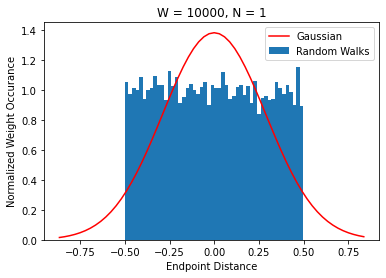

In [5]:
N=1
sigma = np.sqrt(N)*a
HistoWalks(W,N,sigma)

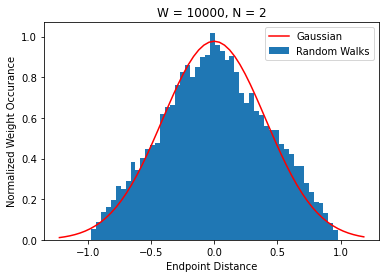

In [6]:
N=2
sigma = np.sqrt(N)*a
HistoWalks(W,N,sigma)

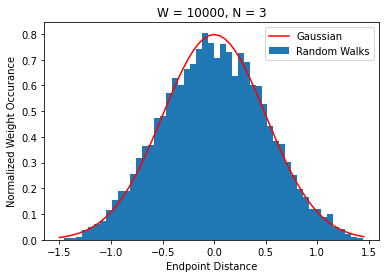

In [7]:
N=3
sigma = np.sqrt(N)*a
HistoWalks(W,N,sigma)

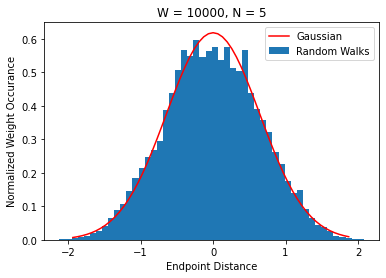

In [8]:
N=5
sigma = np.sqrt(N)*a
HistoWalks(W,N,sigma)

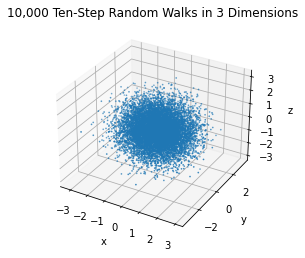

In [18]:
w = WRandomWalks(10000,10,3)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(w[:,0],w[:,1],w[:,2], s=0.5)
plt.title("10,000 Ten-Step Random Walks in 3 Dimensions")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()